<a href="https://colab.research.google.com/github/Mina-ALLA/Test/blob/master/project_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Networks with Keras

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/AbdelMahm/INPT-2020/blob/master/Notebooks/ANN_with_keras.ipynb"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" />Run in Google Colab</a>
  </td>
</table>

In [0]:
#First let's import TensorFlow and Keras and all the other libraries we gonna use
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten, Conv2D
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
#load the data and split it into train set and test set
 mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
#The training set contains 60,000  images, each 28x28 pixels
X_train.shape


(60000, 28, 28)

In [0]:
#The test set contains 10,000  images, each 28x28 pixels
X_test.shape

(10000, 28, 28)

In [0]:
#Each pixel intensity is represented as a byte (0 to 255):
print(X_train.dtype)
print(X_test.dtype)

uint8
uint8


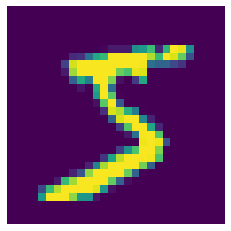

In [0]:
plt.imshow(X_train[0])
plt.axis('off')
plt.show()

In [0]:
y_train[0]

5

In [0]:
#The labels are the class IDs (represented as uint8), from 0 to 9:
y_train


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
#reshape the data to fit the model + normalization of data
X_train=X_train.reshape(60000, 28, 28, 1)
X_test=X_test.reshape(10000, 28, 28, 1)
 

In [0]:
# one-hot encoding
y_train_one_hot=to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)

## print the new label
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
#build the CNN model
model = keras.models.Sequential()
#add model layers
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=[28,28,1]))
model.add(keras.layers.Conv2D(32, kernel_size=3, activation="relu"))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

In [0]:
model.layers

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [0]:
#compile the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [0]:
#train the model
hist = model.fit(X_train, y_train_one_hot, validation_data=(X_test, y_test_one_hot), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0159 - accuracy: 0.9984 - val_loss: 0.6061 - val_accuracy: 0.9805
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0118 - accuracy: 0.9989 - val_loss: 0.7100 - val_accuracy: 0.9815
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0190 - accuracy: 0.9985 - val_loss: 0.7006 - val_accuracy: 0.9793


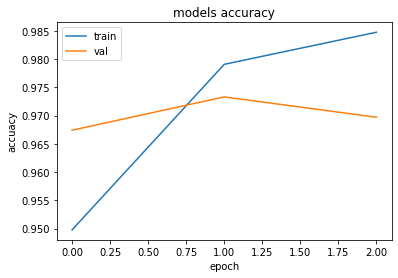

In [0]:
#visualize the model's accuraccy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('models accuracy')
plt.ylabel('accuacy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
hist.params

{'epochs': 3, 'steps': 1875, 'verbose': 1}

In [0]:
#model evaluation
model.evaluate(X_test, y_test_one_hot)

313/313 [==============================] - 1s 3ms/step - loss: 0.1174 - accuracy: 0.9697


[0.11735222488641739, 0.9696999788284302]

In [0]:
#see the predictions as probabilities for the first 4 images in the test set
predictions = model.predict(X_test[:4])
predictions

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0514555e-34, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.6004271e-33, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [0]:
#print out predictions as number labels for the first 4 images
print(np.argmax(predictions, axis=1))
#print out the actual labels
print(y_test[:4])

[7 2 1 0]
[7 2 1 0]


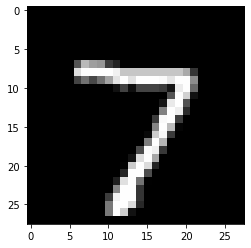

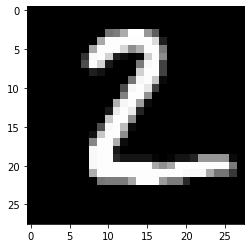

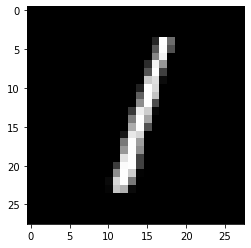

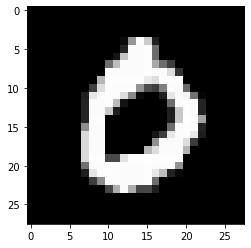

In [0]:
# show the first 4 images as pictures
for i in range(0,4):
    image = X_test[i]
    image = np.array(image, dtype= 'float')
    pixels = image.reshape((28,28))
    plt.imshow(pixels, cmap='gray')
    plt.show()
